In [189]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as plt

In [139]:
data = pd.read_csv("./CICDS_Wednesday.csv")

In [140]:
print(data)

                                         Flow ID       Source IP  Source Port  \
0         192.168.10.14-209.48.71.168-49459-80-6   192.168.10.14        49459   
1         192.168.10.3-192.168.10.17-389-49453-6   192.168.10.17        49453   
2          192.168.10.3-192.168.10.17-88-46124-6   192.168.10.17        46124   
3         192.168.10.3-192.168.10.17-389-49454-6   192.168.10.17        49454   
4          192.168.10.3-192.168.10.17-88-46126-6   192.168.10.17        46126   
...                                          ...             ...          ...   
692698    192.168.10.3-192.168.10.14-53-51114-17   192.168.10.14        51114   
692699    192.168.10.3-192.168.10.16-53-24054-17   192.168.10.16        24054   
692700  192.168.10.51-23.208.163.130-58030-443-6  23.208.163.130          443   
692701    192.168.10.3-192.168.10.14-53-51694-17   192.168.10.14        51694   
692702    192.168.10.3-192.168.10.14-53-57949-17   192.168.10.14        57949   

       Destination IP  Dest

In [141]:
print(data.columns)

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Label'],
      dtype='object')


In [142]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
print(data)

                                         Flow ID       Source IP  Source Port  \
0         192.168.10.14-209.48.71.168-49459-80-6   192.168.10.14        49459   
1         192.168.10.3-192.168.10.17-389-49453-6   192.168.10.17        49453   
2          192.168.10.3-192.168.10.17-88-46124-6   192.168.10.17        46124   
3         192.168.10.3-192.168.10.17-389-49454-6   192.168.10.17        49454   
4          192.168.10.3-192.168.10.17-88-46126-6   192.168.10.17        46126   
...                                          ...             ...          ...   
692698    192.168.10.3-192.168.10.14-53-51114-17   192.168.10.14        51114   
692699    192.168.10.3-192.168.10.16-53-24054-17   192.168.10.16        24054   
692700  192.168.10.51-23.208.163.130-58030-443-6  23.208.163.130          443   
692701    192.168.10.3-192.168.10.14-53-51694-17   192.168.10.14        51694   
692702    192.168.10.3-192.168.10.14-53-57949-17   192.168.10.14        57949   

       Destination IP  Dest

In [143]:
attacked = data[data['Label'] != 'BENIGN']
print(attacked)

                                    Flow ID   Source IP  Source Port  \
6558    172.16.0.1-192.168.10.50-49631-80-6  172.16.0.1        49631   
26700   172.16.0.1-192.168.10.50-49631-80-6  172.16.0.1        49631   
26701   172.16.0.1-192.168.10.50-49632-80-6  172.16.0.1        49632   
26702   172.16.0.1-192.168.10.50-49633-80-6  172.16.0.1        49633   
26703   172.16.0.1-192.168.10.50-49633-80-6  172.16.0.1        49633   
...                                     ...         ...          ...   
692606  172.16.0.1-192.168.10.50-45746-80-6  172.16.0.1        45746   
692613  172.16.0.1-192.168.10.50-45744-80-6  172.16.0.1        45744   
692652  172.16.0.1-192.168.10.50-45762-80-6  172.16.0.1        45762   
692681  172.16.0.1-192.168.10.50-45758-80-6  172.16.0.1        45758   
692696  172.16.0.1-192.168.10.50-45756-80-6  172.16.0.1        45756   

       Destination IP  Destination Port  Protocol           Timestamp  \
6558    192.168.10.50                80         6 2017-05-07 0

In [ ]:
safe = data[data['Label'] == 'BENIGN']

In [144]:
most_timestamp = attacked['Timestamp'].value_counts().idxmax()
print('Waktu paling banyak terjadi serangan :',(most_timestamp))

Waktu paling banyak serangan : 2017-05-07 10:43:00


In [145]:
most_port = attacked['Source Port'].value_counts().idxmax()
print('Source Port :',(most_port))

Source Port terbanyak : 54350


In [111]:
most_suffer = attacked['Destination Port'].value_counts().idxmax()
print('Destination Port terbanyak :',(most_suffer))

Destination Port terbanyak : 80


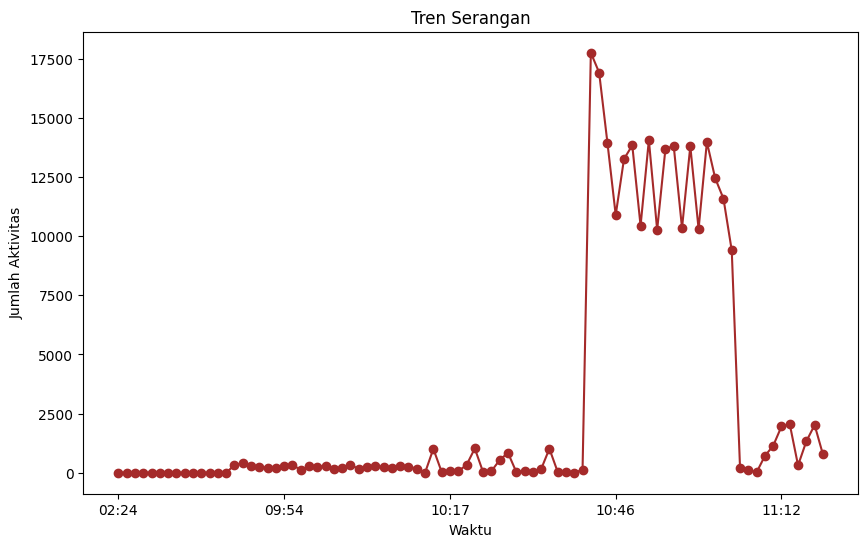

Berdasarkan grafik di atas, didapatkan bahwa jumlah serangan terbanyak pada jam 10:43 dengan jumlah serangan sebanyak  17752


In [170]:
# Tren serangan per waktu

# Groupby dan hitung jumlah kejadian per jam
attacks_per_hour = attacked.groupby(attacked['Timestamp'].dt.strftime('%H:%M'))['Flow ID'].count()
max = attacks_per_hour.max()
time = attacks_per_hour.idxmax()

# Visualisasi
plt.figure(figsize=(10, 6))
activity_per_hour.plot(kind='line', marker='o', color='#A52A2A')
plt.title('Tren Serangan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Aktivitas')
plt.show()

print('Berdasarkan grafik di atas, didapatkan bahwa jumlah serangan terbanyak pada jam',time,'dengan jumlah serangan sebanyak ', max)

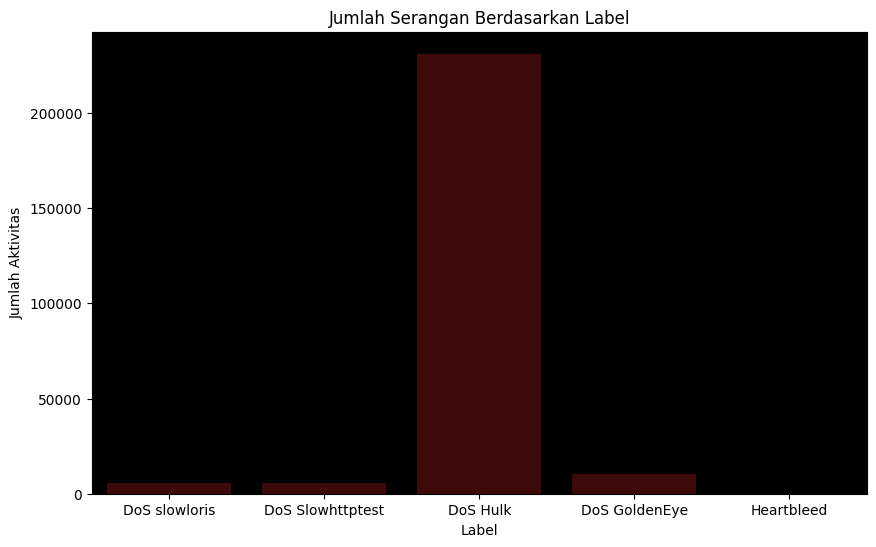

In [186]:
plt.figure(figsize=(10, 6))
sns.set_palette(["#450201"])
sns.countplot(x='Label', data=attacked).set_facecolor('#000000')
plt.title('Jumlah Serangan Berdasarkan Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Aktivitas')
plt.show()

print("Dari diagram batang di atas, didapatkan jumlah serangan terbanyak adalah serangan dengan jenis Dos Hulk yakni")

In [187]:
most_label = attacked['Label'].value_counts()
print(most_label)
most_label = attacked['Label'].value_counts().idxmax()
print('Jenis serangan yang paling banyak :',(most_label))

DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64
Jenis serangan yang paling banyak : DoS Hulk
